In [5]:
import pandas as pd 
import numpy as np
from glob import glob
import seaborn as sns 
import matplotlib.pyplot as plt
import utils
from sklearn.preprocessing import QuantileTransformer

In [2]:
df = utils.df_train
y = df.y_1

In [4]:
y.describe()

count    4.794944e+06
mean    -1.378653e-04
std      2.431780e-02
min     -3.381648e-01
25%     -1.178145e-02
50%     -2.222061e-03
75%      8.463502e-03
max      4.832775e-01
Name: y_1, dtype: float64

In [6]:
qtformer  = QuantileTransformer(n_quantiles=100,output_distribution='normal')
yp = qtformer.fit_transform(y.values.reshape(-1,1))


,y,yp
count,4.794944e+06,4.794944e+06
mean,-1.378653e-04,1.138077e-02
std,2.431780e-02,9.793729e-01
min,-3.381648e-01,-5.199338e+00
25%,-1.178145e-02,-6.633308e-01
50%,-2.222061e-03,1.536334e-02
75%,8.463502e-03,6.793632e-01
max,4.832775e-01,5.199338e+00


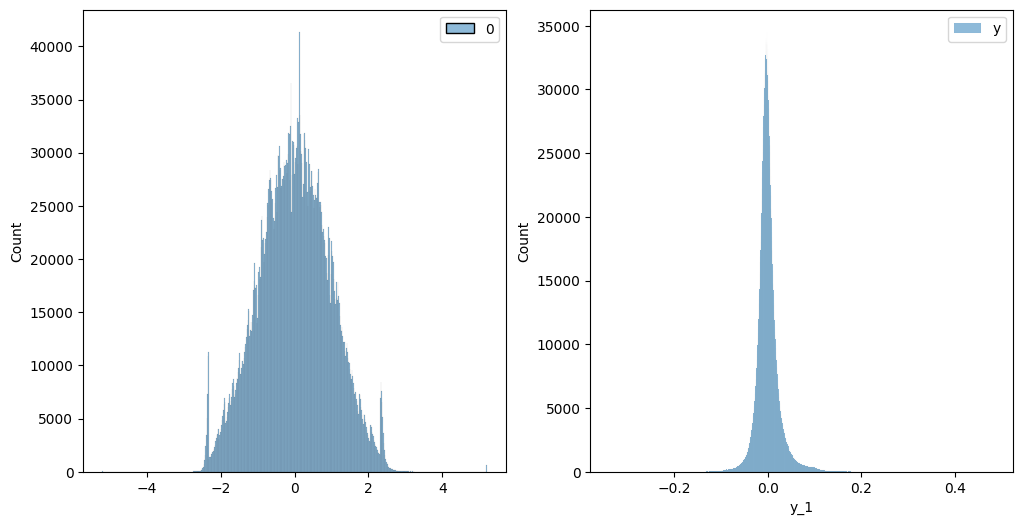

In [7]:
fig,axs = plt.subplots(1,2,figsize=(12,6))
sns.histplot(yp,alpha=0.5,label='yp',ax=axs[0])
sns.histplot(y,alpha=0.5,label='y',ax=axs[1])
plt.legend()
df_y = pd.DataFrame({'y':y,'yp':yp.flatten()})
df_y.describe()

In [9]:
import sweetviz as sv
sweet_report = sv.analyze(df,pairwise_analysis='off')
sweet_report.show_html('sweetviz_report.html')

/home/ray/anaconda3/envs/ag/lib/python3.9/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/home/ray/anaconda3/envs/ag/lib/python3.9/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/home/ray/anaconda3/envs/ag/lib/python3.9/site-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/home/ray/anaconda3/envs/ag/lib/python3.9/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/home/ray/anaconda3/envs/ag/lib/python3.9/site-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/home/ray/anaconda3/envs/ag/lib/python3.9/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may 

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [12]:
x = df.filter(regex='X_')
y = df.y_1

In [17]:
df.delta.__len__()/df.delta.unique().__len__()

10311.70752688172

In [19]:
corr = pd.read_csv('./correlations_df.csv')

Text(0.5, 1.0, 'factor IC')

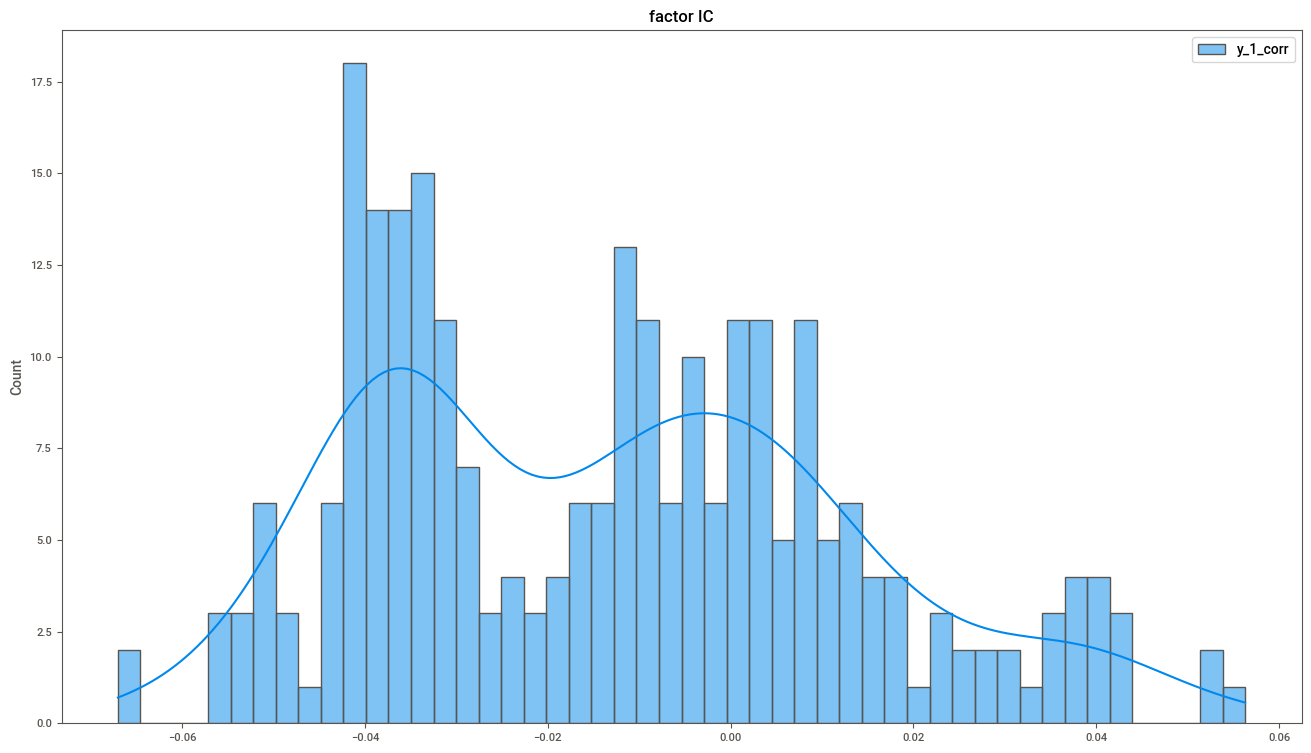

In [37]:
fig = plt.figure(figsize=(16,9))
sns.histplot(corr,kde=True,bins=50)
plt.title('factor IC')

In [7]:
fcor = pd.read_csv('./feature_correlations.csv',index_col=0)

In [8]:
np.mean(fcor)

/home/ray/anaconda3/envs/ag/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


iid      0.004498
X_1      0.154051
X_2      0.015573
X_3      0.009601
X_4      0.074632
           ...   
X_255    0.128092
X_256   -0.113976
X_257   -0.008306
X_258   -0.028118
X_259   -0.053367
Length: 260, dtype: float64

In [14]:
fcor

,iid,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_250,X_251,X_252,X_253,X_254,X_255,X_256,X_257,X_258,X_259
iid,1.000000,0.001713,0.006679,-0.000408,0.002266,-0.011566,0.000058,-0.000423,0.005302,-0.004283,...,0.002222,0.007413,-0.001503,0.000544,0.009309,-0.002521,-0.003064,-0.000453,0.001021,-0.000380
X_1,0.001713,1.000000,-0.014793,-0.018088,0.276207,0.066627,0.208572,-0.016269,-0.087294,-0.424984,...,0.515508,0.120902,-0.116762,0.594966,-0.023180,0.634925,-0.551872,-0.010932,-0.129968,-0.260449
X_2,0.006679,-0.014793,1.000000,0.018812,0.033202,-0.152024,0.014572,-0.018691,-0.061911,-0.015447,...,0.057363,0.149456,-0.063544,0.006025,-0.017169,0.037705,0.023802,-0.144349,-0.013426,0.061366
X_3,-0.000408,-0.018088,0.018812,1.000000,0.002970,-0.023315,0.112556,-0.073603,0.013830,-0.009508,...,0.041197,-0.017766,-0.031252,0.005971,0.013882,-0.019739,0.064859,-0.014442,0.024442,0.229165
X_4,0.002266,0.276207,0.033202,0.002970,1.000000,0.106218,0.100380,-0.030322,-0.103135,-0.183758,...,0.247713,0.019169,-0.017857,0.263030,0.022312,0.162084,-0.242163,-0.088079,-0.061466,-0.144137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X_255,-0.002521,0.634925,0.037705,-0.019739,0.162084,0.025060,0.166289,0.024403,-0.077657,-0.352536,...,0.417296,0.167954,-0.111058,0.371938,-0.018524,1.000000,-0.437276,-0.004624,-0.150252,-0.186308
X_256,-0.003064,-0.551872,0.023802,0.064859,-0.242163,-0.081736,-0.059798,-0.022011,0.026765,0.337604,...,-0.437678,-0.052943,0.054944,-0.299682,0.024646,-0.437276,1.000000,0.060615,0.160984,0.258760
X_257,-0.000453,-0.010932,-0.144349,-0.014442,-0.088079,0.099177,0.057156,-0.023203,0.171377,-0.067534,...,-0.110271,-0.318303,-0.063601,0.000856,-0.055985,-0.004624,0.060615,1.000000,0.016321,0.027101
X_258,0.001021,-0.129968,-0.013426,0.024442,-0.061466,-0.018788,-0.021184,-0.010736,0.014881,0.068445,...,-0.116219,-0.027417,0.017330,-0.118921,-0.005853,-0.150252,0.160984,0.016321,1.000000,0.111467


Text(0.5, 1.0, 'factor correlation')

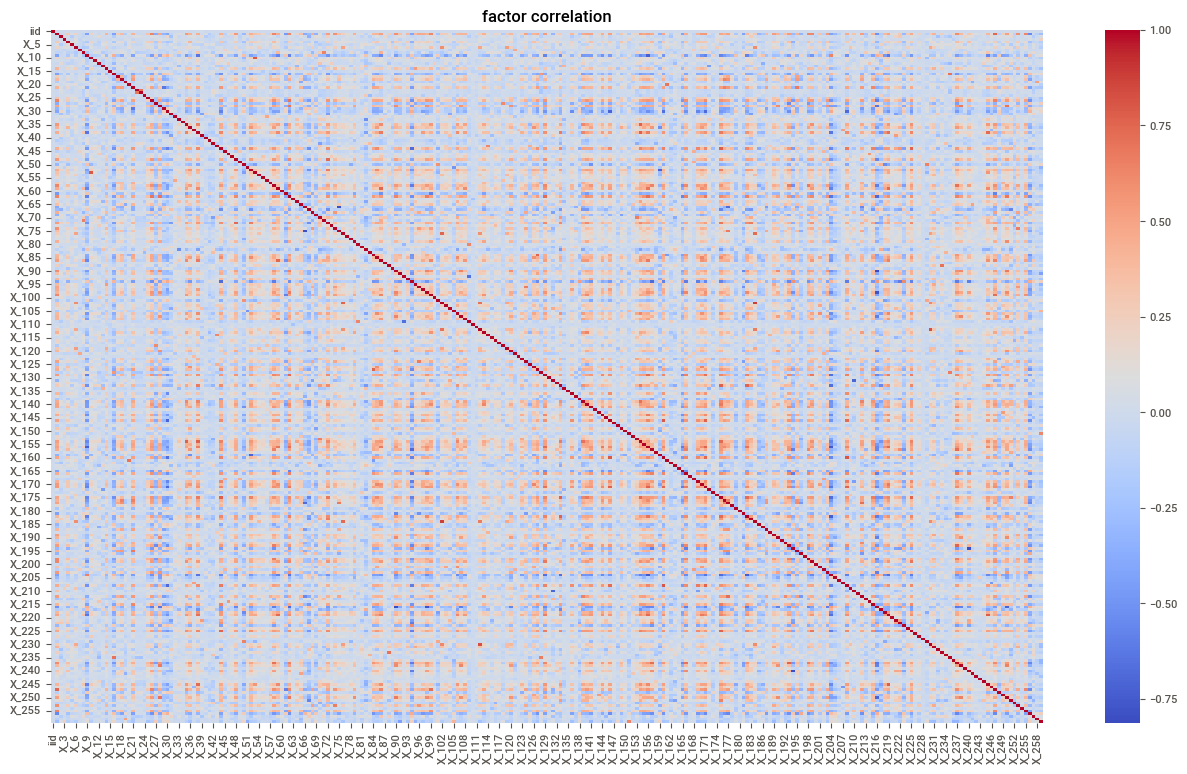

In [36]:
fig = plt.figure(figsize=(16,9))
sns.heatmap(fcor,cmap='coolwarm')
plt.title('factor correlation') 

In [38]:
from  sklearn.linear_model import LassoCV
X_train,y_train = utils.df_train.filter(regex='X_'),utils.df_train.y_1
lr = LassoCV(cv=5,)
lr.fit(X_train,y_train)

/home/ray/anaconda3/envs/ag/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.301e+01, tolerance: 2.836e-01
  model = cd_fast.enet_coordinate_descent(


LassoCV(cv=5)

In [39]:
X_test,y_test = utils.df_test.filter(regex='X_'),utils.df_test.y_1

In [40]:
y_pred = lr.predict(X_test)

In [42]:
tm = utils.ModelMetrics(y_test,y_pred,utils.test_date)

In [43]:
tm.evaluate()

Information Coefficient: 0.0707
Average Returns of Top 10%: -0.0004
Accuracy of Top 10%: 0.1256


In [45]:
lr.alpha_

2.6291840049337168e-06

In [46]:
from sklearn.linear_model import Lasso

In [47]:
fit = Lasso(alpha=lr.alpha_)
fit.fit(X_train,y_train)

/home/ray/anaconda3/envs/ag/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.301e+01, tolerance: 2.836e-01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=2.6291840049337168e-06)

In [48]:
y_pred = fit.predict(X_test)
tm = utils.ModelMetrics(y_test,y_pred,utils.test_date)
tm.evaluate()

Information Coefficient: 0.0707
Average Returns of Top 10%: -0.0004
Accuracy of Top 10%: 0.1256
